# Section 1. Business Understanding

### Istanbul and Athens AirBnB Data

There are essentially two reasons why I made this analysis; first, I live in Istanbul, and Athens is one of my favorite holiday destinations. Second, I intend to occasionally rent my house in Istanbul via Airbnb for passive income
Using the Istanbul and Athens data. So I asked the questions below.

* What will the price range be in 2022, considering that the travel restrictions are likely to be lifted? What is the comparison of these cities?

* What is the total number of houses/rooms listed during 2022 for these cities? Is there any seasonality?

* Do location and room type affect the prices in Istanbul? Which neighborhoods have the most listed houses? Which types of rooms have the highest price?

* Which factors affect the prices in Istanbul?

**Let's get started with the imports**

In [1]:

%matplotlib inline


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns


import math


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/kaggle/input/d/tahaakgun/athens/calendar.csv
/kaggle/input/d/tahaakgun/athens/calendar_nov.csv
/kaggle/input/d/tahaakgun/athens/listings.csv
/kaggle/input/d/tahaakgun/athens/reviews.csv
/kaggle/input/d/tahaakgun/istanbul/calendar.csv
/kaggle/input/d/tahaakgun/istanbul/listings.csv
/kaggle/input/d/tahaakgun/istanbul/reviews.csv


**Warnings and plotting settings**

In [2]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams['font.size'] = 15

import warnings
warnings.filterwarnings('ignore')

# Section 2. Understand the data
I used the insider airbnb data and uploaded to Kaggle.
You can find the details about the data [here](http://insideairbnb.com/get-the-data.html).
We will use 3 data frames in this analysis;

**calendar_is** : calendar dataframe for Istanbul

**calendar_at** : calendar dataframe for Athens

**listings_is** : listings dataframe for Istanbul

**let's get started to understand these dataframes**

In [3]:
calendar_is = pd.read_csv('../input/d/tahaakgun/istanbul/calendar.csv', parse_dates = ['date'])
calendar_is.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,630800,2021-11-28,f,$376.00,$376.00,3.0,1125.0
1,630800,2021-11-29,f,$376.00,$376.00,3.0,1125.0
2,630800,2021-11-30,f,$376.00,$376.00,3.0,1125.0
3,630800,2021-12-01,f,$376.00,$376.00,3.0,1125.0
4,630800,2021-12-02,f,$376.00,$376.00,3.0,1125.0


In [4]:
calendar_at = pd.read_csv('../input/d/tahaakgun/athens/calendar_nov.csv', parse_dates = ['date'])
calendar_at.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1654320,2021-11-23,t,$69.00,$69.00,3.0,1125.0
1,10595,2021-11-23,f,$70.00,$70.00,2.0,1125.0
2,10595,2021-11-24,f,$70.00,$70.00,2.0,1125.0
3,10595,2021-11-25,f,$70.00,$70.00,2.0,1125.0
4,10595,2021-11-26,f,$70.00,$70.00,2.0,1125.0


In [5]:
calendar_is.shape, calendar_at.shape

((8290643, 7), (3515683, 7))

**A look at missing and non missing values**

**Create a function to see the columns without missing values.**

In [6]:
def no_nulls(df):
    '''
    INPUT
        df - a dataframe
    
    OUTPUT
        return a set of not null columns of df
    '''
    return set(df.columns[df.isnull().mean()==0])

**Calendar data frames**

In [7]:
no_nulls(calendar_is) 

{'available', 'date', 'listing_id'}

In [8]:
no_nulls(calendar_at)

{'available', 'date', 'listing_id'}

**A look for the missing values.**

In [9]:
print(calendar_is.isnull().sum())

listing_id          0
date                0
available           0
price             172
adjusted_price    172
minimum_nights      4
maximum_nights      4
dtype: int64


In [10]:
print(calendar_at.isnull().sum())

listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights      2
maximum_nights      2
dtype: int64


**Now it is time move on listings data of Istanbul**

In [11]:
listings_is = pd.read_csv('../input/d/tahaakgun/istanbul/listings.csv')
listings_is.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,20815,https://www.airbnb.com/rooms/20815,20211229195711,2021-12-30,The Bosphorus from The Comfy Hill,Watch The Bosphorus from The Comfy Hill.<br />...,"The lovely neighborhood, Arnavutkoy, is locate...",https://a0.muscache.com/pictures/94805791/481d...,78838,https://www.airbnb.com/users/show/78838,...,4.91,4.79,4.5,NaN,f,2,1,1,0,0.29
1,27271,https://www.airbnb.com/rooms/27271,20211229195711,2021-12-30,Lovely apartment in perfect location,This is a nicely decorated apartment in an an...,Cihangir is one of Istanbul's cosmopolitan sub...,https://a0.muscache.com/pictures/2f9cfc85-8370...,117026,https://www.airbnb.com/users/show/117026,...,5.00,5.00,5.0,NaN,f,1,1,0,0,0.02
2,28277,https://www.airbnb.com/rooms/28277,20211229195711,2021-12-30,Duplex Apartment 11 with Terrace,<b>The space</b><br />The first advantage to s...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,121607,https://www.airbnb.com/users/show/121607,...,5.00,5.00,5.0,NaN,f,16,15,0,0,0.13
3,28318,https://www.airbnb.com/rooms/28318,20211229195711,2021-12-31,Cosy home overlooking Bosphorus,<b>The space</b><br />Easy access to both brid...,Close to Bosphorus University<br />Close to Be...,https://a0.muscache.com/pictures/76617600/0ab5...,121721,https://www.airbnb.com/users/show/121721,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,29241,https://www.airbnb.com/rooms/29241,20211229195711,2021-12-30,"↪ Istanbul, Your second house",<b>The space</b><br />There are many interesti...,NaN,https://a0.muscache.com/pictures/12385994/b9ba...,125742,https://www.airbnb.com/users/show/125742,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


**Shape of the data frame**

In [12]:
listings_is.shape

(22695, 74)

**A look for columns without missing values with our no_nulls function.**

In [13]:
no_nulls(listings_is)

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'has_availability',
 'host_has_profile_pic',
 'host_id',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_name',
 'host_picture_url',
 'host_since',
 'host_thumbnail_url',
 'host_total_listings_count',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'maximum_maximum_nights',
 'maximum_minimum_nights',
 'maximum_nights',
 'maximum_nights_avg_ntm',
 'minimum_maximum_nights',
 'minimum_minimum_nights',
 'minimum_nights',
 'minimum_nights_avg_ntm',
 'neighbourhood_cleansed',
 'number_of_reviews',
 'number_of_reviews_l30d',
 'number_of_reviews_ltm',
 'picture_url',
 'pric

In [14]:
listings_is.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22695 non-null  int64  
 1   listing_url                                   22695 non-null  object 
 2   scrape_id                                     22695 non-null  int64  
 3   last_scraped                                  22695 non-null  object 
 4   name                                          22672 non-null  object 
 5   description                                   20368 non-null  object 
 6   neighborhood_overview                         9773 non-null   object 
 7   picture_url                                   22695 non-null  object 
 8   host_id                                       22695 non-null  int64  
 9   host_url                                      22695 non-null 

**We can check some categorical variables**

**Neighbourhood and number of listed houses**

In [15]:
listings_is['neighbourhood_cleansed'].value_counts()

Beyoglu          6271
Fatih            3130
Sisli            3103
Kadikoy          2094
Besiktas         1436
Uskudar           681
Esenyurt          626
Kagithane         484
Atasehir          353
Maltepe           340
Bagcilar          305
Sariyer           305
Bakirkoy          287
Bahcelievler      270
Umraniye          247
Basaksehir        240
Adalar            237
Sile              224
Avcilar           215
Pendik            215
Eyup              202
Kartal            196
Kucukcekmece      185
Beykoz            127
Beylikduzu        126
Buyukcekmece      120
Gaziosmanpasa      92
Arnavutkoy         92
Zeytinburnu        92
Tuzla              88
Gungoren           59
Sancaktepe         55
Cekmekoy           55
Silivri            36
Bayrampasa         29
Catalca            24
Sultangazi         19
Esenler            18
Sultanbeyli        17
Name: neighbourhood_cleansed, dtype: int64

**Accommodation types**

In [16]:
listings_is['room_type'].value_counts()

Entire home/apt    12929
Private room        8750
Hotel room           570
Shared room          446
Name: room_type, dtype: int64

**What features does house have?**

In [17]:
listings_is['amenities'].value_counts()

["Long term stays allowed"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              163
["Breakfast", "Long term stays allowed", "First aid kit", "Lock on bedroom door", "TV", "Carbon monoxide alarm", "Fire extinguisher", "Essentials", "Hair dryer", "Heating", "Hangers", "Shampoo", "Elevator", "Wifi", "Smoke alarm", "Air conditioning", "

# Section 3. Data Preparation

we will clean and prepare data for analysis

## Preparing calendar dataframes of Athens and Istanbul
**for Q1 and Q2 we will compare Athens and Istanbul, with calendar dataframes.**

**The 'price' column is in str format. We will change it to float number.** 
Also the price data is in $ format but it is actually in local currency so we need to convert it.

**we will drop 'adjusted_price','minimum_nights', 'maximum_nights' because we do not use it**

In [18]:
def price_to_float(df, col):
    '''
    INPUT
        df - a dataframe
        col - a column of data frame
    
    OUTPUT
        return dataframe with replaced $ sign string values in col to a float number
    '''
    df[col] = df[col].str.replace(r'[^-+\d.]', '').astype(float)
    
    return df
    


In [19]:
calendar_is = price_to_float(calendar_is, 'price')
calendar_at = price_to_float(calendar_at, 'price')

In [20]:
calendar_is['price'] = calendar_is['price'] / 15  # convert Turkish liras to Euro for comparison reasons.
calendar_is = calendar_is.drop(columns=['adjusted_price','minimum_nights','maximum_nights'])
calendar_is.head()

,listing_id,date,available,price
0,630800,2021-11-28,f,25.066667
1,630800,2021-11-29,f,25.066667
2,630800,2021-11-30,f,25.066667
3,630800,2021-12-01,f,25.066667
4,630800,2021-12-02,f,25.066667


In [21]:
calendar_at = calendar_at.drop(columns=['adjusted_price','minimum_nights','maximum_nights'])
calendar_at.head()

,listing_id,date,available,price
0,1654320,2021-11-23,t,69.0
1,10595,2021-11-23,f,70.0
2,10595,2021-11-24,f,70.0
3,10595,2021-11-25,f,70.0
4,10595,2021-11-26,f,70.0


## Change Available to number
**To use available column for calculation changed from 't' and 'f' to , 1 and 0.**

In [22]:
calendar_is['available'] = calendar_is['available'].map({'t':1, 'f':0})
calendar_at['available'] = calendar_at['available'].map({'t':1, 'f':0})

**I also drop the first and last dates becauses there is only half of the datas, fro visualisation reasons.**

In [23]:
calendar_at.drop(calendar_at[(calendar_at['date'] == '2022-11-22') | (calendar_at['date'] == '2021-11-22')].index, inplace = True)
calendar_is.drop(calendar_is[(calendar_is['date'] == '2022-11-28') | (calendar_is['date'] == '2021-11-28')].index, inplace = True)

## Cleaning Listings data of Istanbul

**After we check the data , we will use below columns to answer questions**

P.S :there are also other features that can be analysis and also can be used for modeling.

In [24]:
columns = [
    'id',
    'neighbourhood_cleansed',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'price',
    'availability_30',
    'minimum_nights',
]

In [25]:
new_listings = listings_is.filter(columns, axis=1)
new_listings.head()

,id,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,availability_30,minimum_nights
0,20815,Besiktas,Entire rental unit,Entire home/apt,3,2.0,2.0,"$1,235.00",28,365
1,27271,Beyoglu,Entire rental unit,Entire home/apt,2,1.0,1.0,$408.00,1,30
2,28277,Sisli,Entire serviced apartment,Entire home/apt,5,1.0,2.0,$688.00,22,14
3,28318,Sariyer,Entire rental unit,Entire home/apt,2,2.0,2.0,"$1,412.00",28,3
4,29241,Beyoglu,Private room in rental unit,Private room,3,1.0,1.0,$515.00,30,3


In [27]:
new_listings = price_to_float(new_listings, 'price')
new_listings['price'] = new_listings['price'] / 15 # euro conversion again

In [28]:
new_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22695 non-null  int64  
 1   neighbourhood_cleansed  22695 non-null  object 
 2   property_type           22695 non-null  object 
 3   room_type               22695 non-null  object 
 4   accommodates            22695 non-null  int64  
 5   bedrooms                21237 non-null  float64
 6   beds                    21528 non-null  float64
 7   price                   22695 non-null  float64
 8   availability_30         22695 non-null  int64  
 9   minimum_nights          22695 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.7+ MB


**we can easily drop missing values in bedrooms and beds because there is a few missing values.


In [29]:
new_listings = new_listings.dropna(subset=['beds', 'bedrooms'])

In [30]:
new_listings.describe()

,id,accommodates,bedrooms,beds,price,availability_30,minimum_nights
count,2.014800e+04,20148.00000,20148.000000,20148.000000,20148.000000,20148.000000,20148.000000
mean,3.839711e+07,3.33646,1.536629,2.218037,63.033075,20.473943,6.756353
std,1.535765e+07,2.20537,1.666221,2.765869,165.299651,10.803716,34.836095
min,2.081500e+04,1.00000,1.000000,1.000000,3.266667,0.000000,1.000000
25%,3.170098e+07,2.00000,1.000000,1.000000,20.600000,14.000000,1.000000
50%,4.382512e+07,3.00000,1.000000,2.000000,37.400000,26.000000,2.000000
75%,5.081153e+07,4.00000,2.000000,3.000000,63.800000,29.000000,3.000000
max,5.403525e+07,16.00000,50.000000,195.000000,6868.400000,30.000000,1000.000000


**There is a lot of outliers and inconsistent entries in this data**

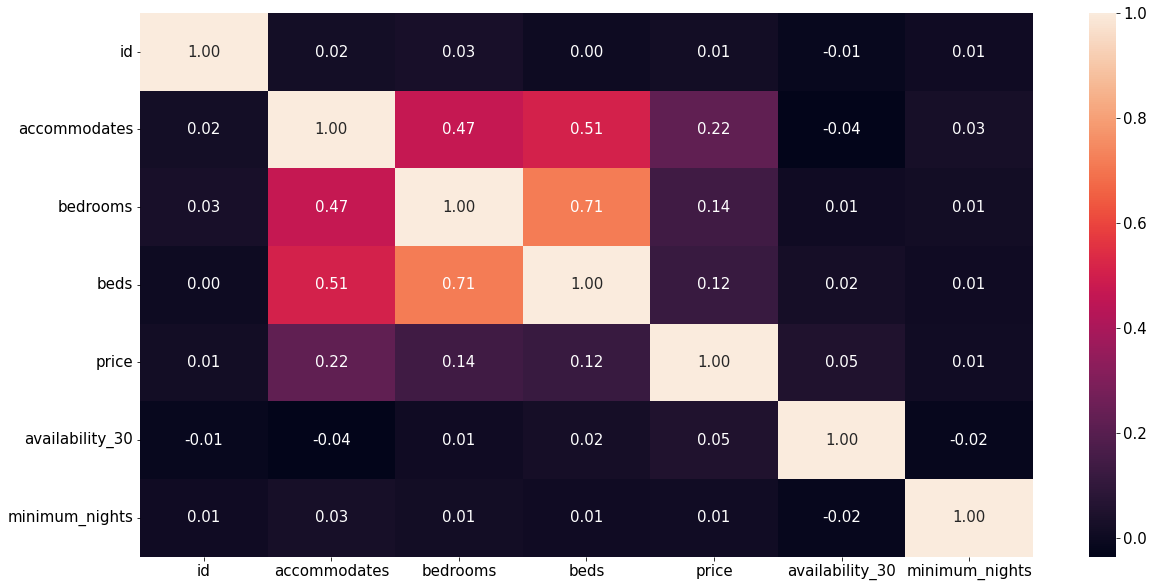

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
ax=sns.heatmap(new_listings.corr(), annot=True, fmt=".2f");

**There is a slight correlation between price and beds, bedrooms and accommodataion.**

* * *

In [32]:
new_listings[new_listings['bedrooms']>=20]

,id,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,availability_30,minimum_nights
3320,20701559,Fatih,Room in boutique hotel,Private room,8,20.0,25.0,29.533333,26,1
4109,26021701,Kadikoy,Private room in yurt,Private room,16,50.0,50.0,8.333333,0,1
4540,28265904,Sisli,Yurt,Entire home/apt,16,50.0,50.0,8.333333,0,1
5990,33451282,Fatih,Room in boutique hotel,Private room,3,24.0,3.0,22.533333,27,1
6148,33893709,Fatih,Room in boutique hotel,Hotel room,2,23.0,2.0,31.066667,26,1
6726,35348542,Sisli,Room in hotel,Private room,2,26.0,35.0,20.933333,29,1
8279,38562178,Sisli,Room in hotel,Hotel room,3,31.0,42.0,4866.600000,30,1
8451,38862800,Fatih,Room in boutique hotel,Private room,16,20.0,45.0,666.666667,26,1
8455,38867735,Beyoglu,Room in boutique hotel,Private room,16,22.0,35.0,23.933333,30,1
10124,41696234,Sile,Room in boutique hotel,Private room,2,20.0,1.0,53.333333,30,1


after we look at the data we analyze that there are some incorrect entries , the bedrooms > 20 table have inconsistent data.

In [35]:
new_listings = new_listings[new_listings['bedrooms']<20]

In [40]:
new_listings[new_listings['price']>=2000]

,id,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,availability_30,minimum_nights
545,1768486,Fatih,Entire rental unit,Entire home/apt,4,1.0,2.0,3139.800000,30,3
1340,5393495,Beyoglu,Entire rental unit,Entire home/apt,2,1.0,1.0,6868.400000,0,1
2320,11406502,Uskudar,Private room in condominium (condo),Private room,1,1.0,1.0,2332.133333,30,30
4236,26947099,Fatih,Private room in castle,Private room,6,6.0,6.0,2332.133333,30,1
5517,31974054,Fatih,Room in boutique hotel,Hotel room,2,1.0,2.0,5570.466667,2,1
5768,32893601,Fatih,Entire residential home,Entire home/apt,4,2.0,4.0,3333.333333,0,1
6656,35172547,Sisli,Entire rental unit,Entire home/apt,7,2.0,2.0,3700.000000,30,1
7260,36459046,Kartal,Shared room in rental unit,Shared room,2,1.0,1.0,4000.000000,30,1
9953,41347371,Kucukcekmece,Entire serviced apartment,Entire home/apt,4,1.0,1.0,3498.200000,23,3
11770,44474452,Sariyer,Entire villa,Entire home/apt,10,7.0,8.0,4264.000000,0,30


**Turns out these high priced homes mostly rented for monthly. This type of accommodation is not related with purpose of this analysis, so we drop these columns as well.**

In [41]:
new_listings = new_listings[(new_listings['price']<2000)]
new_listings.head()

,id,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,availability_30,minimum_nights
0,20815,Besiktas,Entire rental unit,Entire home/apt,3,2.0,2.0,82.333333,28,365
1,27271,Beyoglu,Entire rental unit,Entire home/apt,2,1.0,1.0,27.200000,1,30
2,28277,Sisli,Entire serviced apartment,Entire home/apt,5,1.0,2.0,45.866667,22,14
3,28318,Sariyer,Entire rental unit,Entire home/apt,2,2.0,2.0,94.133333,28,3
4,29241,Beyoglu,Private room in rental unit,Private room,3,1.0,1.0,34.333333,30,3


In [42]:
new_listings.describe()

,id,accommodates,bedrooms,beds,price,availability_30,minimum_nights
count,2.009700e+04,20097.000000,20097.000000,20097.000000,20097.000000,20097.000000,20097.000000
mean,3.838950e+07,3.328606,1.490421,2.168582,58.650399,20.466040,6.760711
std,1.536474e+07,2.185581,1.066518,1.953389,93.283367,10.801957,34.876989
min,2.081500e+04,1.000000,1.000000,1.000000,3.266667,0.000000,1.000000
25%,3.168550e+07,2.000000,1.000000,1.000000,20.600000,14.000000,1.000000
50%,4.382392e+07,3.000000,1.000000,2.000000,37.400000,25.000000,2.000000
75%,5.081746e+07,4.000000,2.000000,3.000000,63.666667,29.000000,3.000000
max,5.403525e+07,16.000000,19.000000,50.000000,1975.133333,30.000000,1000.000000


Finally we drop a few missing values and inconsistent or wrong entry data.

### we are ready for the analysis

# Section 4. Data Analysis
Now the data is ready

##      1. ) What will the price range be in 2022, considering that the travel restrictions are likely to be lifted? What is the comparison of these cities?

**We will plot price vs date.**

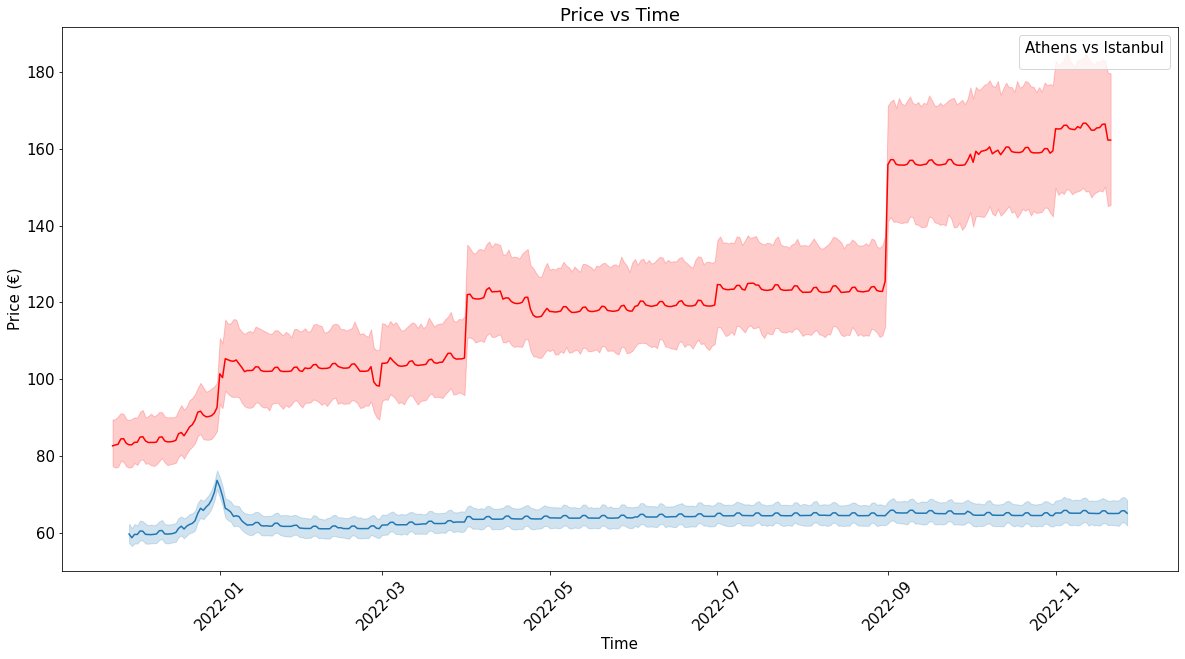

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x = "date", y = "price", 
                  markers = True, dashes = False, color= 'red', data = calendar_at, ax=ax)
sns.lineplot(x = "date", y = "price", 
                  markers = True, dashes = False, data = calendar_is, ax=ax)
plt.xticks(rotation = 45)
plt.title('Price vs Time')
plt.xlabel('Time')
plt.ylabel('Price (€)')
plt.legend(loc='best', title= 'Athens vs Istanbul')

The data is updated on 27 Sep 2021 and includes prices and availability for the upcoming 365 days. The average price of listed houses is around 85 € and 60 € respectively in Athens and Istanbul.
We can see three ramp-ups at Athens listings’ average price in January, April, and September 2022. However, the average price level does not change in Istanbul except on New Year’s Eve.

## 2.) What is the total number of houses/rooms listed during 2022 for these cities? Is there any seasonality?

## Listed Houses 
Listed daily number of houses.

In [44]:
listed_is =  calendar_is.groupby('date').agg({'listing_id':'count','available':'mean'})
listed_is.columns = ['listed', 'available_prop']
listed_is['available_house_nums'] = listed_is['listed'] * listed_is['available_prop']
listed_is.reset_index()


,date,listed,available_prop,available_house_nums
0,2021-11-29,22714,0.477635,10849.0
1,2021-11-30,22714,0.577133,13109.0
2,2021-12-01,22714,0.626090,14221.0
3,2021-12-02,22714,0.643964,14627.0
4,2021-12-03,22714,0.642511,14594.0
...,...,...,...,...
359,2022-11-23,22715,0.696192,15814.0
360,2022-11-24,22715,0.696236,15815.0
361,2022-11-25,22715,0.696324,15817.0
362,2022-11-26,22715,0.696324,15817.0


In [45]:
listed_at =  calendar_at.groupby('date').agg({'listing_id':'count','available':'mean'})

listed_at.columns = ['listed', 'available_prop']
listed_at['available_house_nums'] = listed_at['listed'] * listed_at['available_prop']
listed_at.reset_index()

,date,listed,available_prop,available_house_nums
0,2021-11-23,9632,0.295577,2847.0
1,2021-11-24,9632,0.351744,3388.0
2,2021-11-25,9632,0.359427,3462.0
3,2021-11-26,9632,0.344477,3318.0
4,2021-11-27,9632,0.351537,3386.0
...,...,...,...,...
359,2022-11-17,9632,0.619394,5966.0
360,2022-11-18,9632,0.619913,5971.0
361,2022-11-19,9632,0.619809,5970.0
362,2022-11-20,9632,0.620536,5977.0


In [46]:
# Population of Istanbul from Wikipedia
pop_is = 15460000
# Population of Athens from Wikipedia
pop_at = 3167000

the population ratio is 5:1 between Istanbul and Athens

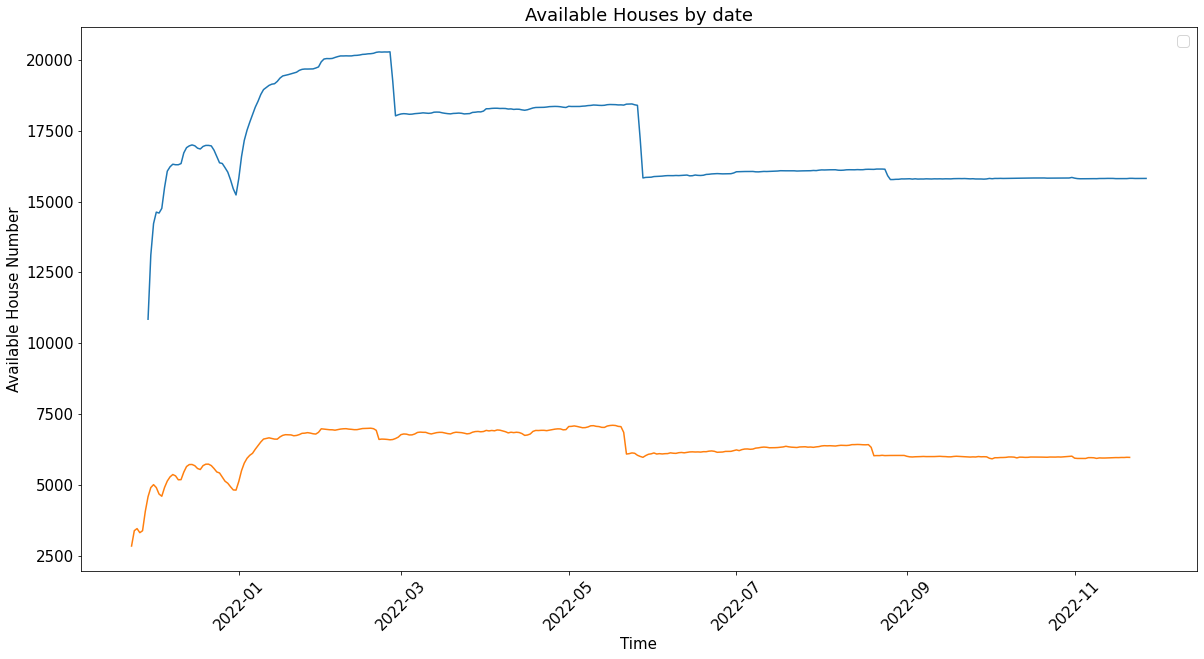

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))
                      
sns.lineplot(x = 'date', y = "available_house_nums", 
                   data = listed_is, ax=ax)
sns.lineplot(x = 'date', y = "available_house_nums", 
                   data = listed_at, ax=ax)

plt.xticks(rotation = 45)
plt.title('Available Houses by date')
plt.xlabel('Time')
plt.ylabel('Available House Number')
plt.legend(loc='best')


Daily listed house numbers are around 20K and 7,5K respectively in Istanbul and Athens. The change in available house numbers can be seen in parallel.

## 3.) Do location and room type affect the prices in Istanbul? Which neighborhoods have the most listed houses? Which types of rooms have the highest price?

We'll choose top 6 areas for the analysis

In [48]:
nbhood = new_listings['neighbourhood_cleansed'].value_counts()
df_nbhood = pd.DataFrame(nbhood)
df_nbhood = df_nbhood.reset_index()
df_nbhood.columns = ['neighbourhood_cleansed', 'nums']
nbhood_top = df_nbhood.iloc[:5]
nbhood_top

,neighbourhood_cleansed,nums
0,Beyoglu,5575
1,Sisli,2790
2,Fatih,2716
3,Kadikoy,1898
4,Besiktas,1282


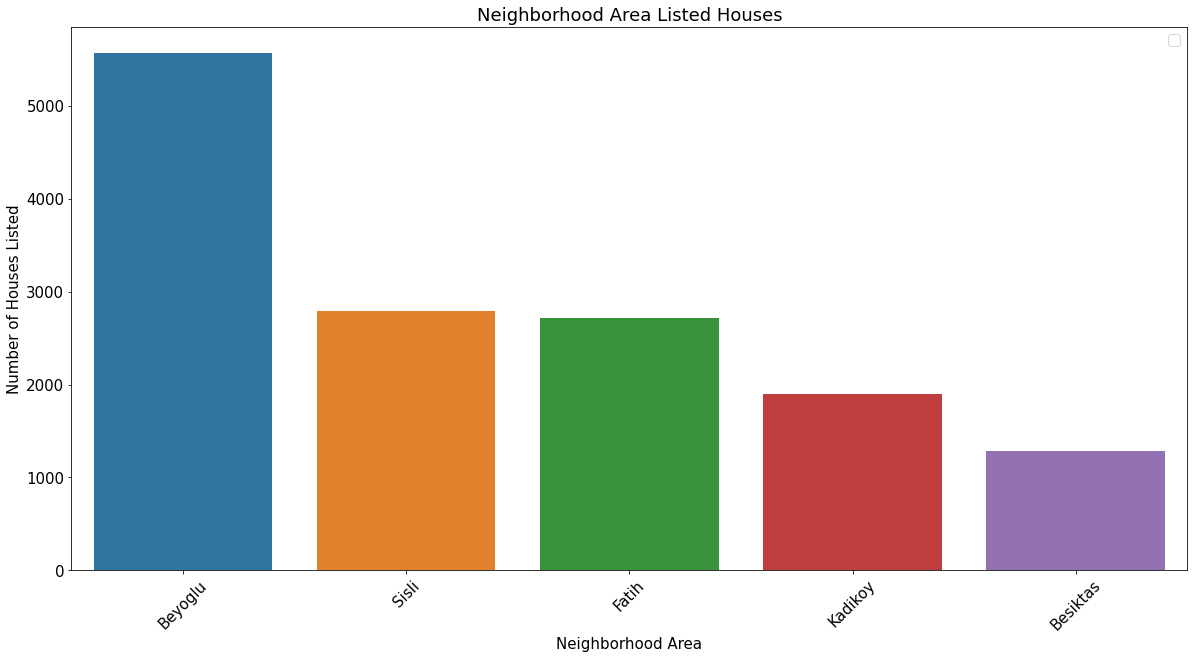

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x = 'neighbourhood_cleansed',y = 'nums', data = nbhood_top)

plt.xticks(rotation = 45)
plt.title('Neighborhood Area Listed Houses')
plt.xlabel('Neighborhood Area')
plt.ylabel('Number of Houses Listed')
plt.legend(loc='best')

Beyoğlu has the most listed house numbers. 

*P.S.: It is the most tourist place in Istanbul

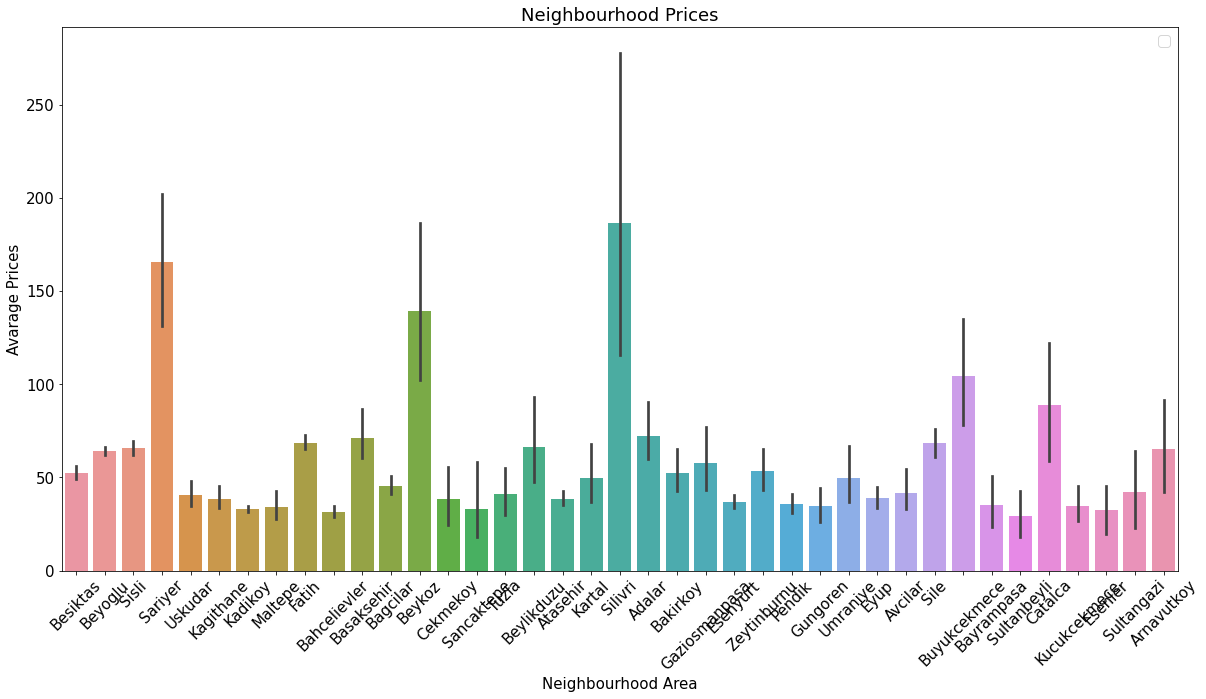

In [54]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot( x = 'neighbourhood_cleansed',y = 'price',data = new_listings)

plt.xticks(rotation = 45)
plt.title('Neighbourhood Prices')
plt.xlabel('Neighbourhood Area')
plt.ylabel('Avarage Prices')
plt.legend(loc='best')


The average prices are highest in Silivri which the houses are generally luxury villas for summer holidays.
Sarıyer and Beykoz are located on the opposite sides of bhosphorus comes the second and third respectively.

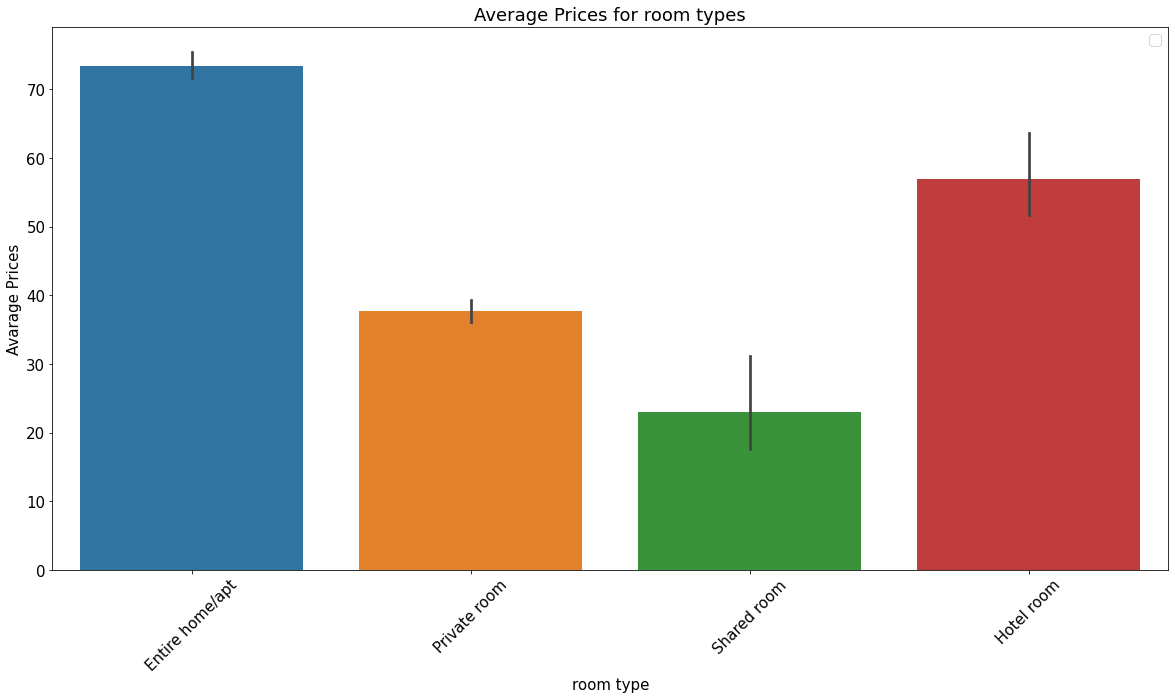

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot( x = 'room_type',y = 'price',data = new_listings)
plt.xticks(rotation = 45)
plt.title('Average Prices for room types')
plt.xlabel('room type')
plt.ylabel('Avarage Prices')
plt.legend(loc='best')


Besides hotel room, the prices change from entire home/apt to shared room as expected.

# 4.) Which factors affect the prices in Istanbul?

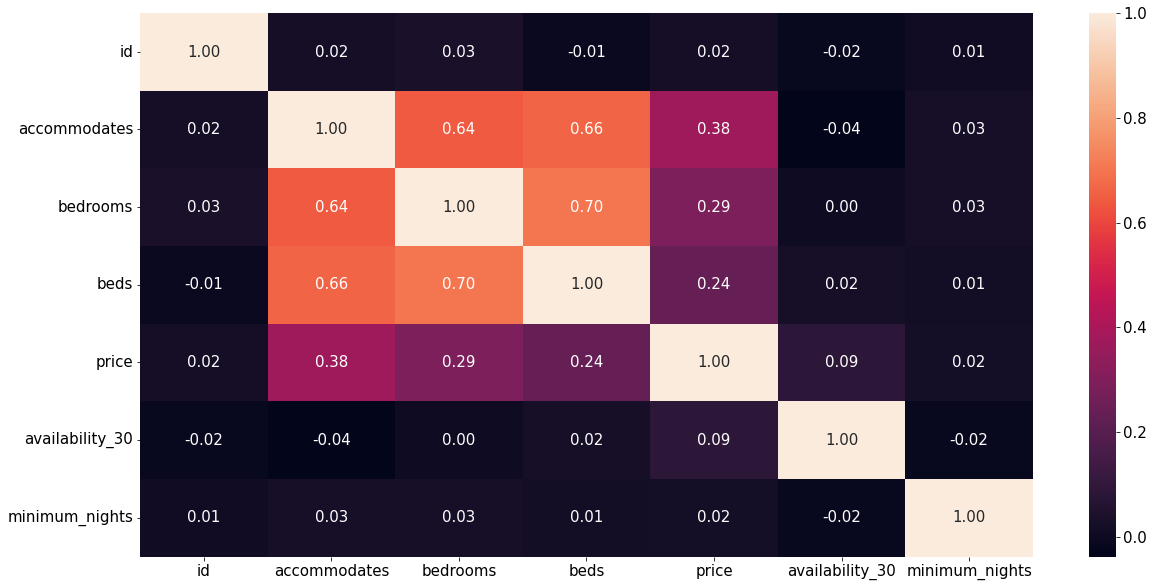

In [52]:
fig, ax = plt.subplots(figsize=(20, 10))
ax=sns.heatmap(new_listings.corr(), annot=True, fmt=".2f");


we can see the correlation between price and, bedrooms, beds and accomodation

## Conclusion

We  analyzed the data, I analyzed booking data for Athens and Istanbul.
I made a price and listed houses comparison. Then, I ask questions about the listings data of Istanbul. If I want to rent my house, what features should I consider? What affects the prices the most?
For further steps, we will use the listings data and try to create a model which can predict price.